In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed


# Loading in the strings for the data files 0:hw=10, 1:hw=12, 2:hw=14, 3:hw=16, 4:hw=18, 5:hw=20
vNN_dat_chi2bM3A = [r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO010.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO010.meho", r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO012.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO012.meho",r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO014.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO014.meho", r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO016.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO016.meho", r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO018.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO018.meho", r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO020.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO020.meho"]
vNN_dat_chi2bSMSI5C = [r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO010.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO010.meho", r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO012.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO012.meho", r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO014.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO014.meho", r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO016.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO016.meho", r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO018.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO018.meho", r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO020.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO020.meho"]
tRel_dat = [r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO010.meho\trel_NMax100_LMax02_hwHO010.meho", r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO012.meho\trel_NMax100_LMax02_hwHO012.meho", r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO014.meho\trel_NMax100_LMax02_hwHO014.meho", r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO016.meho\trel_NMax100_LMax02_hwHO016.meho", r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO018.meho\trel_NMax100_LMax02_hwHO018.meho", r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO020.meho\trel_NMax100_LMax02_hwHO020.meho"]

In this notebook we are going to discuss how to solve for the groundstate energy of the Deuteron, the simplest many body quantum problem in nuclear structure physics. 

We are going to do so in two different basises: The Harmonic Oscillator and the momentum basis. We will then compare these two approaches. 

Let us start with the Harmonic Oscillator. We create a function which returns the eigenvalues we look for when entering the data. 

 

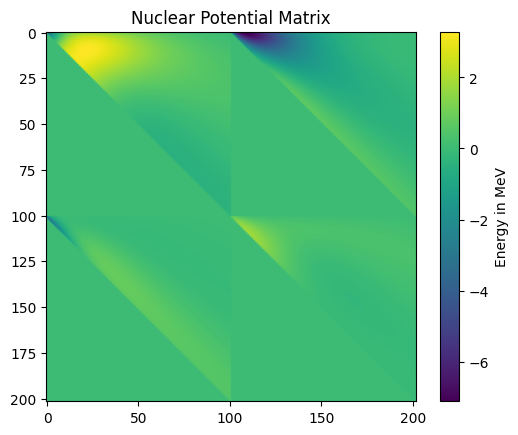

V_20 vs. V_02^T:
False


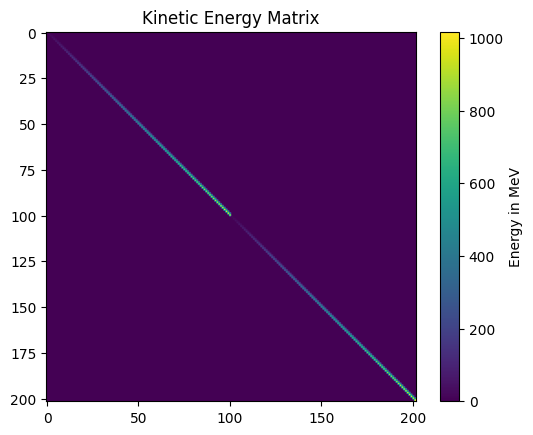

(3.617164281648801+0j)


In [ ]:
def create_hamiltonian_WIP_NON_herm(file1, file2, plotting = None):
    """ A function that creates the Hamiltonian matrix from the nuclear potential and kinetic energy matrices. 

    The function reads in the nuclear potential and kinetic energy matrices from the files file1 and file2, respectively.
    The function then filters and sorts the matrices by angular momentum and orbital angular momentum.
    The function then creates and returns the Hamiltonian matrix by adding the nuclear potential and kinetic energy matrices.
    If plotting is set to True, the function will plot the nuclear potential and kinetic energy matrices.
    This function is a work in progress and is not functional for illustrative purposes.
    The upper dioagonal matices are left as is, without symmetrization.


    Args:
        file1 (string): denotes path to the nuclear potential matrix file
        file2 (string): denotes path to the kinetic energy matrix file
        plotting (boolean, optional): Decide wether or not to plot the matrices. Defaults to None.

    Returns:
        NumpyArray: Hamiltonian matrix (unsymmetrized)
    """
    
    # Read in the data
    vNN = pd.read_csv(file1, sep = r"\s+", header = None, skiprows = 1)
    tRel = pd.read_csv(file2, sep = r"\s+", header = None, skiprows = 1)

    # Rename the columns
    vNN = vNN.rename(columns = {0: "N", 1: "L", 2: "NN", 3:"LL", 4:"S", 5:"J", 6: "T", 7:"MT", 8:"E"})
    tRel = tRel.rename(columns = {0: "N", 1: "L", 2: "NN", 3:"LL", 4:"S", 5:"J", 6: "T", 7:"MT", 8:"E"})

    # Filter the data according to our knowledge of the quantum numbers
    vNN = vNN.loc[(vNN['J'] == 1) & (vNN['S'] == 1) & (vNN['T'] == 0) & (vNN['MT'] == 0)]
    tRel = tRel.loc[(tRel['J'] == 1) & (tRel['S'] == 1) & (tRel['T'] == 0) & (tRel['MT'] == 0)]

    # Sort the data by angular momentum and orbital angular momentum
    vNN = vNN.sort_values(['L',"LL"])
    tRel = tRel.sort_values(['L',"LL"])

    # Create the individual submatrices of the potential energy matrix
    V_00 = vNN[(vNN['L'] == 0) & (vNN["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_02 = vNN[(vNN['L'] == 0) & (vNN["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_20 = vNN[(vNN['L'] == 2) & (vNN["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_22 = vNN[(vNN['L'] == 2) & (vNN["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values

    # Create the potential energy matrix as a block matrix from the submatrices
    V = np.block([[V_00, V_02], [V_20, V_22]])

    # Create the individual submatrices of the kinetic energy matrix
    T_00 = tRel[(tRel['L'] == 0) & (tRel["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_02 = tRel[(tRel['L'] == 0) & (tRel["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_20 = tRel[(tRel['L'] == 2) & (tRel["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_22 = tRel[(tRel['L'] == 2) & (tRel["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values

    # Create the kinetic energy matrix as a block matrix from the submatrices
    T = np.block([[T_00, T_02], [T_20, T_22]])

    # Plot the matrices if plotting is set to True
    if plotting:
        
        # Validate symmetry of submatrices
        print("V_20 vs. V_02^T:")
        print(np.allclose(V_20, V_02.T))
        
        # Plot the potential energy matrix
        plt.imshow(V)
        plt.colorbar(label = "Energy in MeV")
        plt.title("Nuclear Potential Matrix")
        plt.show()
        
        # Plot the kinetic energy matrix
        plt.imshow(T)
        plt.colorbar(label = "Energy in MeV")
        plt.title("Kinetic Energy Matrix")
        plt.show()

    return V+T

def solve_eigensystem(m):
    """ A function that solves the eigensystem of a matrix m and returns the eigenvalues and eigenvectors.

    Args:
        m (NumpyMatrix): The matrix for which the eigensystem is to be solved.

    Returns:
        NumpyArray, NumyArray: The eigenvalues and eigenvectors of the matrix m.
    """
    w, v = np.linalg.eig(m)
    w = np.sort(w)
    return w, v

# Create the Hamiltonian matrix (WIP) for the chi2bM3A potential and the hw=10 data
H = create_hamiltonian_WIP_NON_herm(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], plotting = True)

# Solve the eigensystem of the Hamiltonian matrix (WIP)
w, v = solve_eigensystem(H)

# Print the lowest eigenvalue
w = np.sort(w)
print(w[0])



    

Wait? Is out data wrong? We know that we should have a hermitian matrix, and what is up with the weird triangular shape?


No the data is correct. It is just saved in a manner which saves space. This is more relevant for larger data sets but we better learn about it sooner than later. 
I did actually fall into this little trap as well. But we can quickly fix our function keeping the symmetry of the final hamiltonian in mind.

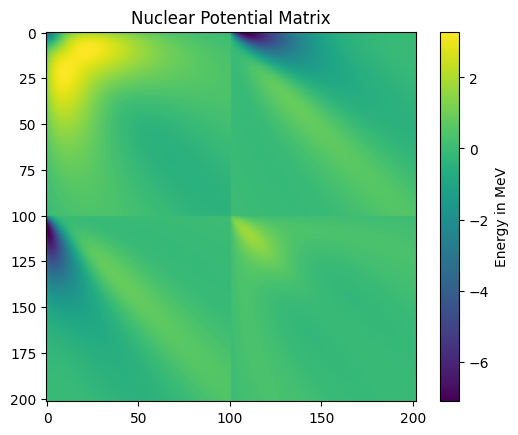

H_20 vs. H_02^T:
True


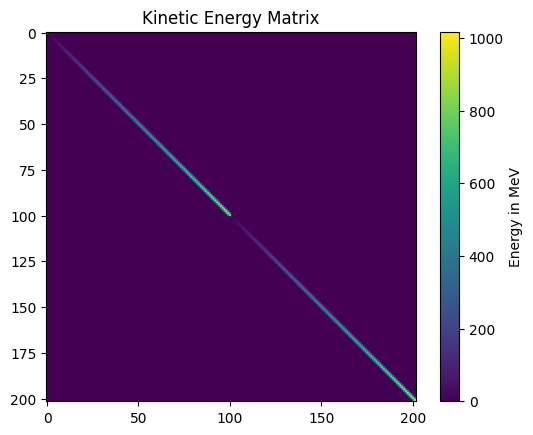

-2.2229970371096175


In [ ]:
def symmetrize(m):
    """ A function that symmetrizes a matrix m by adding it to its transpose and subtracting the diagonal.

    Args:
        m (NumpyArray): The matrix to be symmetrized.

    Returns:
        NumpyArray: The symmetrized matrix.
    """
    return m + m.T - np.diag(m.diagonal())

def hermitize(m01, m10):
    """ A function that hermitizes a matrix m01 by adding another matrix m10 to its transpose and subtracting the diagonal.

    Args:
        m01 (NumpyArray): The matrix to be hermitized.
        m10 (NumpyArray): The matrix to be added to the transpose of m01.

    Returns:
        NumpyArray: The hermitized matrix.
    """
    return m01 + m10.T - np.diag(m01.diagonal())

def create_hamiltonian(file1, file2, Nmax = None, plotting = None):
    """ A function that creates the Hamiltonian matrix from the nuclear potential and kinetic energy matrices. 

    The function reads in the nuclear potential and kinetic energy matrices from the files file1 and file2, respectively.
    The function then filters and sorts the matrices by angular momentum and orbital angular momentum.
    The function then trunctuates the matrices leaving it a Nmax by Nmax matrix.
    The function hermitizes the matrices and symmetrizes them.
    The function then creates and returns the Hamiltonian matrix by adding the nuclear potential and kinetic energy matrices.
    If plotting is set to True, the function will plot the nuclear potential and kinetic energy matrices.
    This function is a work in progress and is not functional for illustrative purposes.
    The upper dioagonal matices are left as is, without symmetrization.


    Args:
        file1 (string): denotes path to the nuclear potential matrix file
        file2 (string): denotes path to the kinetic energy matrix file
        Nmax (int, optional): The maximum value of the quantum number N. Defaults to None.
        plotting (boolean, optional): Decide wether or not to plot the matrices. Defaults to None.

    Returns:
        NumpyArray: Hamiltonian matrix (unsymmetrized)
    """
    
    # Read in the data
    vNN = pd.read_csv(file1, sep = r"\s+", header = None, skiprows = 1)
    tRel = pd.read_csv(file2, sep = r"\s+", header = None, skiprows = 1)

    # Rename the columns
    vNN = vNN.rename(columns = {0: "N", 1: "L", 2: "NN", 3:"LL", 4:"S", 5:"J", 6: "T", 7:"MT", 8:"E"})
    tRel = tRel.rename(columns = {0: "N", 1: "L", 2: "NN", 3:"LL", 4:"S", 5:"J", 6: "T", 7:"MT", 8:"E"})

    # Filter the data according to our knowledge of the quantum numbers
    vNN = vNN.loc[(vNN['J'] == 1) & (vNN['S'] == 1) & (vNN['T'] == 0) & (vNN['MT'] == 0)]
    tRel = tRel.loc[(tRel['J'] == 1) & (tRel['S'] == 1) & (tRel['T'] == 0) & (tRel['MT'] == 0)]

    # Trunctuate the N-entries with Nmax
    if Nmax is not None:
        vNN = vNN[(vNN['N'] <= Nmax) & (vNN['NN'] <= Nmax)]
        tRel = tRel[(tRel['N'] <= Nmax) & (tRel['NN'] <= Nmax)]

    # Sort the data by angular momentum and orbital angular momentum
    vNN = vNN.sort_values(['L',"LL"])
    tRel = tRel.sort_values(['L',"LL"])

    # Create the submatrices of the potential energy matrix
    V_00 = vNN[(vNN['L'] == 0) & (vNN["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_02_wip = vNN[(vNN['L'] == 0) & (vNN["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_20_wip = vNN[(vNN['L'] == 2) & (vNN["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_22 = vNN[(vNN['L'] == 2) & (vNN["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values

    # Symmetrize / Hermitize the submatrices
    V_00 = symmetrize(V_00)
    V_02 = hermitize(V_02_wip, V_20_wip)
    V_20 = hermitize(V_20_wip, V_02_wip)
    V_22 = symmetrize(V_22)

    # Create the potential energy matrix as a block matrix from the submatrices
    V = np.block([[V_00, V_02], [V_20, V_22]])

    # Create the submatrices of the kinetic energy matrix
    T_00 = tRel[(tRel['L'] == 0) & (tRel["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_02 = tRel[(tRel['L'] == 0) & (tRel["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_20 = tRel[(tRel['L'] == 2) & (tRel["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_22 = tRel[(tRel['L'] == 2) & (tRel["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values

    # Symmetrize the submatrices
    T_00 = symmetrize(T_00)
    T_22 = symmetrize(T_22)

    # Create the kinetic energy matrix as a block matrix from the submatrices
    T = np.block([[T_00, T_02], [T_20, T_22]])

    # Plot the matrices if plotting is set to True
    if plotting:
        
        # Validate symmetry of submatrices
        print("V_20 vs. V_02^T:")
        print(np.allclose(V_20, V_02.T))
        
        # Plot the potential energy matrix
        plt.imshow(V)
        plt.colorbar(label = "Energy in MeV")
        plt.title("Nuclear Potential Matrix")
        plt.show()
        
        # Plot the kinetic energy matrix
        plt.imshow(T)
        plt.colorbar(label = "Energy in MeV")
        plt.title("Kinetic Energy Matrix")
        plt.show()

    return V+T

def solve_eigensystem_gsE(file1, file2, Nmax = None):
    """ A function that solves the eigensystem of the Hamiltonian matrix and returns the ground state energy.
    Based on Nmax we are dealing with a truncated Hamiltonian.
    We use the create_hamiltonian function to create the Hamiltonian matrix and then solve the eigensystem.

    Args:
        file1 (string): denotes path to the nuclear potential matrix file
        file2 (string): denotes path to the kinetic energy matrix file
        Nmax (int, optional): The maximum value of the quantum number N. Defaults to None (no trunctuation).
        plotting (boolean, optional): Decide wether or not to plot the matrices. Defaults to None.

    Returns:
        float: Ground state energy of the Hamiltonian matrix for a given Nmax.
    """
    # Create the Hamiltonian matrix for a given Nmax (trunctuated) or untrunctuated
    if Nmax is not None:
        # trunctuated
        H = create_hamiltonian(file1, file2, Nmax)
    else:
        # untrunctuated
        H = create_hamiltonian(file1, file2)
    
    # Solve the eigensystem of the Hamiltonian matrix
    w, v = np.linalg.eig(H)
    
    # Sort the eigenvalues
    w_sorted = np.sort(w)
    
    # Return the ground state energy
    return w_sorted[0]

# Create the Hamiltonian matrix for the chi2bM3A potential and the hw=10 data
H = create_hamiltonian(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], plotting = True)

# Solve the eigensystem of the Hamiltonian matrix and print the lowest eigenvalue
gsE = solve_eigensystem_gsE(vNN_dat_chi2bSMSI5C[0], tRel_dat[0])
print(gsE)



And just like that we have sucessfully calculated the ground state energy of the deuteron! 

But what do the matrices and the ground state energy look like if we begin to trunctuate?

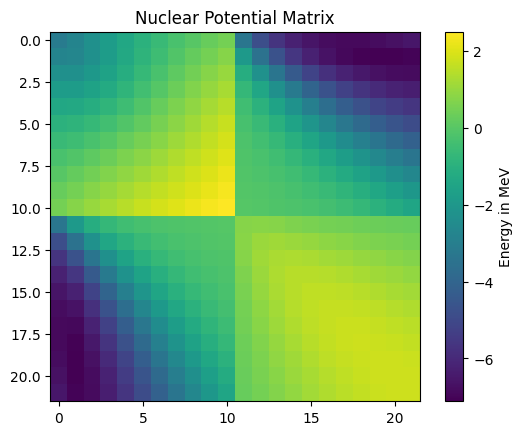

H_20 vs. H_02^T:
True


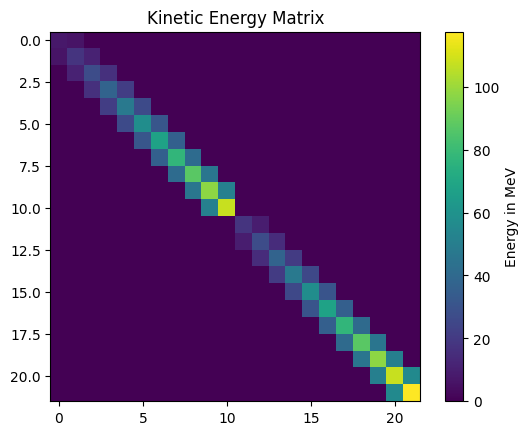

-0.5756846405992917


In [ ]:
# Create the Hamiltonian matrix for the chi2bM3A potential and the hw=10 data with Nmax = 10
H = create_hamiltonian(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], 10 ,plotting = True)

# Solve the eigensystem of the Hamiltonian matrix and print the lowest eigenvalue
gsE = solve_eigensystem_gsE(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], 10)
print(gsE)

This last trunctuation was definitly to severe, how many N's do we need? Let us try to be a bit more systematic:

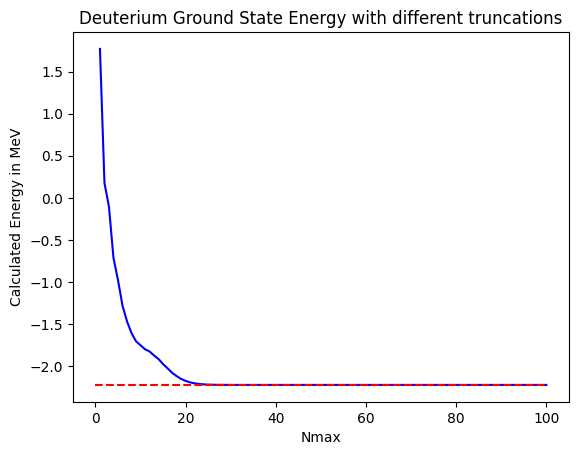

In [26]:
def plot_gsE_vs_Nmax(file1, file2, Nmax_arr):
    """ A function that plots the ground state energy of the Hamiltonian matrix for different truncations.
    The function uses the solve_eigensystem_gsE function to solve the eigensystem for different truncations.

    Args:
        file1 (string): denotes path to the nuclear potential matrix file
        file2 (string): denotes path to the kinetic energy matrix file
        Nmax_arr (integer): An array of truncations to be used in the calculation.
    """
    gsE = []
    # Loop over the truncations and solve the eigensystem
    for Nmax in Nmax_arr:
        # Append the ground state energy to the list
        gsE.append(solve_eigensystem_gsE(file1, file2, Nmax))
    # Plot the ground state energy vs. truncation
    plt.plot(Nmax_arr, gsE, color="b", label = "Calculated Energy")
    plt.title("Deuterium Ground State Energy with different truncations")
    plt.xlabel("Nmax")
    plt.ylabel("Calculated Energy in MeV")
    plt.hlines(-2.224575, 0, 100, colors = "r", linestyles = "dashed", label = "Experimental Value")
    plt.show()

# Plot the ground state energy vs. truncation for the chi2bM3A potential and the hw=10 data
Nmax_arr = np.arange(1,101, 1)
plot_gsE_vs_Nmax(vNN_dat_chi2bM3A[0], tRel_dat[0], Nmax_arr)

We see that the calculated ground state energy converges very quickly to the experimentally found true value. (At Nmax = 30 we can say that we have obtained a good approximation! This helps us to save time during later calculations) 

Now we can use the functions we have programmed to further analyse the convergence behaviour of our trunctuations. Let us start by looking at the convergence behaviour for different $\hbar\omega$ values. 

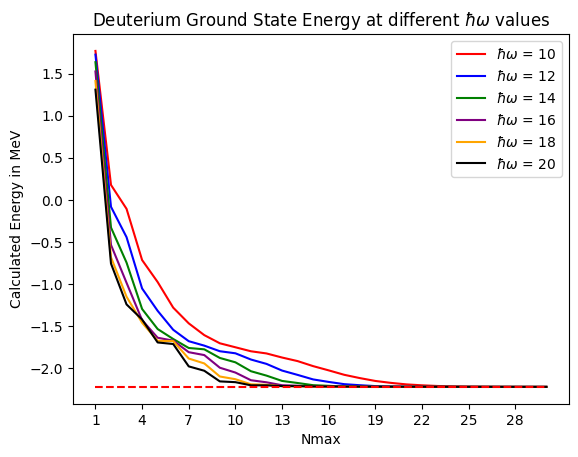

In [29]:
# Plot the ground state energy vs. truncation for the chi2bM3A potential and the hw=10 -> hw=20 data
Nmax_arr = np.arange(1,31, 1)

gsE = [[],[],[],[],[],[]]
# Loop over the different data files and solve the eigensystem for Nmax = 30
for i in range(6):
    for Nmax in Nmax_arr:
        gsE[i].append(solve_eigensystem_gsE(vNN_dat_chi2bM3A[i], tRel_dat[i], Nmax))
# Plot the ground state energy vs. truncation for the different data files
plt.plot(Nmax_arr, gsE[0], label = "$\hbar \omega$ = 10", color = "red")
plt.plot(Nmax_arr, gsE[1], label = "$\hbar \omega$ = 12", color = "blue")
plt.plot(Nmax_arr, gsE[2], label = "$\hbar \omega$ = 14", color = "green")
plt.plot(Nmax_arr, gsE[3], label = "$\hbar \omega$ = 16", color = "purple")
plt.plot(Nmax_arr, gsE[4], label = "$\hbar \omega$ = 18", color = "orange")
plt.plot(Nmax_arr, gsE[5], label = "$\hbar \omega$ = 20", color = "black")

plt.legend()
plt.xticks(np.arange(1,31,3))
plt.title("Deuterium Ground State Energy at different $\hbar \omega$ values")
plt.xlabel("Nmax")
plt.ylabel("Calculated Energy in MeV")
plt.hlines(-2.224644, 1, 30, color = "red", linestyles = "dashed")
plt.show()

We saw that as we increase $\hbar\omega$ the speed of convergence decreases. So we will work with $\hbar\omega=10$ from now on. We also saw that our calculations still take their time. We will later see a way to improve this quite significantly!

We will now compare the ground state energy for the different ways of creating the Hamiltonian matrix-elements: chi2bM3A and chi2bSMSI5C potentials. But we will have to  decrease our truncation to Nmax = 10...

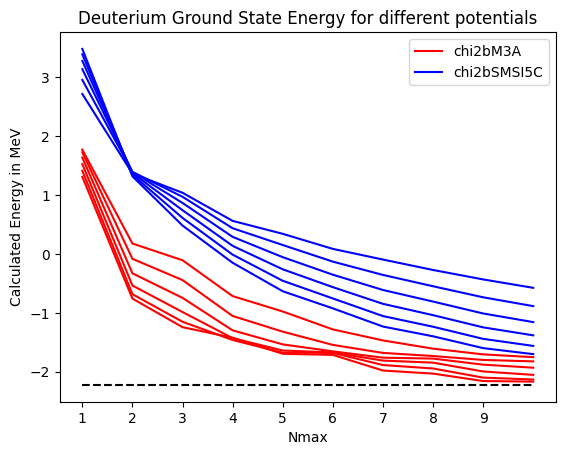

In [ ]:
Nmax_arr = np.arange(1,11, 1) 

# Loop over the different data files and solve the eigensystem for Nmax = 10 for the chi2bM3A and chi2bSMSI5C potentials
gsE_M3A = [[],[],[],[],[],[]]
gSE_SMSI5C = [[],[],[],[],[],[]]
for i in range(6):
    for Nmax in Nmax_arr:
        gsE_M3A[i].append(solve_eigensystem_gsE(vNN_dat_chi2bM3A[i], tRel_dat[i], Nmax))
        gSE_SMSI5C[i].append(solve_eigensystem_gsE(vNN_dat_chi2bSMSI5C[i], tRel_dat[i], Nmax))

# Plot the ground state energy vs. truncation for the different $\hbar \omega$ values for the chi2bM3A and chi2bSMSI5C potentials
plt.plot(Nmax_arr, gsE_M3A[0], label = "chi2bM3A", color = "red")
plt.plot(Nmax_arr, gsE_M3A[1], color = "red")
plt.plot(Nmax_arr, gsE_M3A[2], color = "red")
plt.plot(Nmax_arr, gsE_M3A[3], color = "red")
plt.plot(Nmax_arr, gsE_M3A[4], color = "red")
plt.plot(Nmax_arr, gsE_M3A[5], color = "red")

plt.plot(Nmax_arr, gSE_SMSI5C[0], label = "chi2bSMSI5C", color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[1], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[2], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[3], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[4], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[5], color = "blue")

plt.legend()
plt.xticks(np.arange(1,10,1))
plt.xlabel("Nmax")
plt.ylabel("Calculated Energy in MeV")
plt.title("Deuterium Ground State Energy for different potentials")
plt.hlines(-2.224644, 1, 10, color = "black", linestyles = "dashed")
plt.show()

Here we see that the potential we agreed to use (chi2bM3A) converges faster. But can we really speak about convergence here? Not really!
What we can do however is not only letting one of our processor-cores do all the work. Using the joblib library we can easily parallelize the calculation of our ground state energies! Lets see where this will get us: 

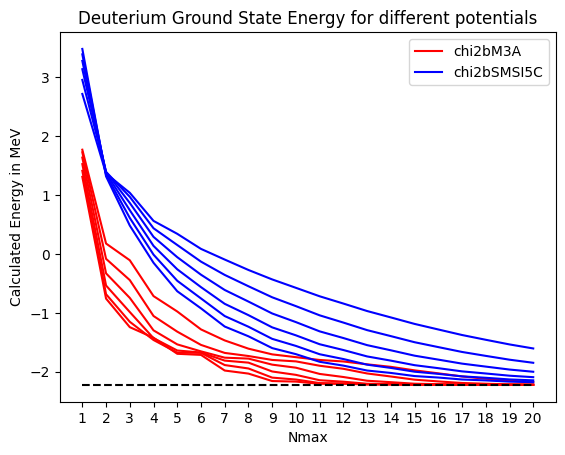

In [30]:
Nmax_arr = np.arange(1,21, 1)

gsE_M3A = [[],[],[],[],[],[]]
gSE_SMSI5C = [[],[],[],[],[],[]]

# Loop over the different data files and solve the eigensystem for Nmax = 10 for the chi2bM3A and chi2bSMSI5C potentials
for i in range(6):
    # Define a function that computes the ground state energy for a given Nmax for the chi2bM3A and chi2bSMSI5C potentials
    def compute_gsE(i, Nmax):
        return (solve_eigensystem_gsE(vNN_dat_chi2bM3A[i], tRel_dat[i], Nmax),
                solve_eigensystem_gsE(vNN_dat_chi2bSMSI5C[i], tRel_dat[i], Nmax))

    # Use joblib to parallelize the computation of the ground state energy
    results = Parallel(n_jobs=-1)(delayed(compute_gsE)(i, Nmax) for Nmax in Nmax_arr)

    # Append the results to the lists for plotting
    for Nmax, (gsE_M3A_val, gSE_SMSI5C_val) in zip(Nmax_arr, results):
        gsE_M3A[i].append(gsE_M3A_val)
        gSE_SMSI5C[i].append(gSE_SMSI5C_val)

# Plot the ground state energy vs. truncation for the different $\hbar \omega$ values for the chi2bM3A and chi2bSMSI5C potentials
plt.plot(Nmax_arr, gsE_M3A[0], label = "chi2bM3A", color = "red")
plt.plot(Nmax_arr, gsE_M3A[1], color = "red")
plt.plot(Nmax_arr, gsE_M3A[2], color = "red")
plt.plot(Nmax_arr, gsE_M3A[3], color = "red")
plt.plot(Nmax_arr, gsE_M3A[4], color = "red")
plt.plot(Nmax_arr, gsE_M3A[5], color = "red")

plt.plot(Nmax_arr, gSE_SMSI5C[0], label = "chi2bSMSI5C", color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[1], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[2], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[3], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[4], color = "blue")
plt.plot(Nmax_arr, gSE_SMSI5C[5], color = "blue")

plt.legend()
plt.xticks(np.arange(1,21,1))
plt.xlabel("Nmax")
plt.ylabel("Calculated Energy in MeV")
plt.title("Deuterium Ground State Energy for different potentials")
plt.hlines(-2.224644, 1, 20, color = "black", linestyles = "dashed")
plt.show()

We have performed our calculations for double the Nmax values in half of the time. I'd call this a success! 

Just as a little bonus, we can also take a look into the actual radial wavefunction inside the deuteron in an HO-Basis for different Nmax values: 

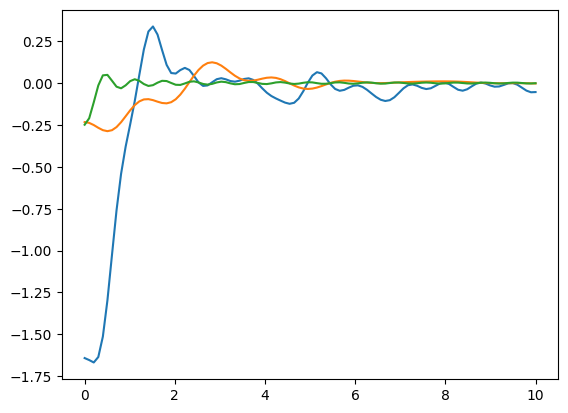

In [25]:
from scipy.special import eval_genlaguerre, gammaln

# Zwei kleine Funktionen aus unseren Production-Codes (C), die die Radialwellenfunktionen des HO liefern. Sie nutzen Routinen aus der GSL (SNU Scientific Library), 
# um die Laguerre-Polynome oder Fakultäten/Gamma-Funktionen auszuwerten. Da müsstest Du nach den entsprechenden Python-Funktionen suchen.

# Constant for the relative harmonic oscillator length
aHOrel = np.sqrt((197.327)**2/(10*938.272))  #  sqrt((hbar*c)**2/(m_nucleon*hw))

# Radial wave function R[r]
def coord_space_wave_func_ho_rnl(N, L, r):
    rr = r / aHOrel
    return np.exp(-0.5 * rr**2) * rr**L * eval_genlaguerre(N, L + 0.5, rr**2) / (aHOrel * np.sqrt(aHOrel))

# Normalization factor
def coord_space_wave_func_ho_rnl_norm(N, L):
    # Compute the normalization factor using gamma functions
    return np.sqrt(2) * np.exp(0.5 * (gammaln(N + 1.0) - gammaln(N + L + 1.5)))


# def find_wave_func(file1, file2, Nmax = None):
#     if Nmax is not None:
#         H = create_hamiltonian(file1, file2, Nmax)
#     else:
#         H = create_hamiltonian(file1, file2)

#     w, v = np.linalg.eig(H)
#     v_sorted = np.sort(v)
#     w_sorted = np.sort(w)
#     def wave_func(L, r):
#         temp = []
#         for i in range (len(v_sorted[0])):
#             temp.append(v_sorted[0][i]*coord_space_wave_func_ho_rnl(Nmax, L, r)*coord_space_wave_func_ho_rnl_norm(Nmax, L))
#         temp = np.array(temp)
#         func = np.sum(temp, axis = 0)
#         return func
#     plt.plot(np.linspace(0, 10, 100), wave_func(0, np.linspace(0, 10, 100)))
#     # plt.show()
#     return w_sorted[0]

def find_wave_func0(file1, file2, Nmax_arr, L, r):
    temp = []
    for Nmax in Nmax_arr:
        H = create_hamiltonian(file1, file2, Nmax)
        w, v = np.linalg.eig(H)
        #print(w)
        #print(v)
        w_eig = np.sort(w)[0]
        # find index corresponding to the smallest eigenvalue
        index = np.where(w == w_eig)
        # find the corresponding eigenvector
        v_sorted = v[index]
        temp.append(v_sorted[0][Nmax]*coord_space_wave_func_ho_rnl(Nmax, L, r)*coord_space_wave_func_ho_rnl_norm(Nmax, L))
    temp = np.array(temp)
    func = np.sum(temp, axis = 0)
    return func

def find_wave_func1(file1, file2, Nmax_arr, L, r):
    temp = []
    for Nmax in Nmax_arr:
        H = create_hamiltonian(file1, file2, Nmax)
        w, v = np.linalg.eig(H)
        #print(w)
        #print(v)
        w_eig = np.sort(w)[0]
        # find index corresponding to the smallest eigenvalue
        index = np.where(w == w_eig)
        # find the corresponding eigenvector
        v_eig = v[index][0]
        v_sorted = v_eig[0]
        temp.append(v_sorted*coord_space_wave_func_ho_rnl(Nmax, L, r)*coord_space_wave_func_ho_rnl_norm(Nmax, L))
    temp = np.array(temp)
    func = np.sum(temp, axis = 0)
    return func

def find_wave_func2(file1, file2, Nmax, L, r):
    temp = []
    H = create_hamiltonian(file1, file2, Nmax)
    w, v = np.linalg.eig(H)

    w_eig = np.sort(w)[0]
    
    # find index corresponding to the smallest eigenvalue
    index = np.where(w == w_eig)

    # find the corresponding eigenvector
    v_eig = v[index][0]
    
    for v in v_eig:
        temp.append(v*coord_space_wave_func_ho_rnl(Nmax, L, r)*coord_space_wave_func_ho_rnl_norm(Nmax, L))
    temp = np.array(temp)
    func = np.sum(temp, axis = 0)
    return func

N_max_arr = np.arange(1, 101, 1)
plt.plot(np.linspace(0, 10, 100), find_wave_func0(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], N_max_arr, 0, np.linspace(0, 10, 100)))
plt.plot(np.linspace(0, 10, 100), find_wave_func1(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], N_max_arr, 0, np.linspace(0, 10, 100)))
plt.plot(np.linspace(0, 10, 100), find_wave_func2(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], 99, 0, np.linspace(0, 10, 100)))
plt.show()


# #find_wave_func(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], 10)
# N_max_arr = np.arange(98, 101, 1)
# # plot for different Nmax
# for Nmax in N_max_arr:
#     find_wave_func(vNN_dat_chi2bSMSI5C[0], tRel_dat[0], Nmax)
#     plt.title(f"Wave function for Nmax = {Nmax}")
# plt.show()


What's next? We saw that for the HO-basis our calculated deuteron ground-state energy converges uniformly towards the experimental value when increasing the trunctuation Parameter N. Is that always the case? Lets explore another basis-expansion: The momentum basis!

In [32]:
# Read in the data for the chi2bM3A potential submatrices for different grid sizes

# 50x50 grid 0-10 fm**(-1) in 0.2 fm**(-1) steps
md_050_100100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid050\chi2bM3A_srg0000_JLLSTMT10010+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=51)
md_050_102100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid050\chi2bM3A_srg0000_JLLSTMT10210+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=51)
md_050_120100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid050\chi2bM3A_srg0000_JLLSTMT12010+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=51)
md_050_122100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid050\chi2bM3A_srg0000_JLLSTMT12210+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=51)

grid050 = [md_050_100100, md_050_102100, md_050_120100, md_050_122100]

# 100x100 grid 0-10 fm**(-1) in 0.1 fm**(-1) steps
md_100_100100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid100\chi2bM3A_srg0000_JLLSTMT10010+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=101)
md_100_102100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid100\chi2bM3A_srg0000_JLLSTMT10210+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=101)
md_100_120100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid100\chi2bM3A_srg0000_JLLSTMT12010+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=101)
md_100_122100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid100\chi2bM3A_srg0000_JLLSTMT12210+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=101)

grid100 = [md_100_100100, md_100_102100, md_100_120100, md_100_122100]

# 150x150 grid 0-10 fm**(-1) in 0.06666666666666667 fm**(-1) steps
md_150_100100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid150\chi2bM3A_srg0000_JLLSTMT10010+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=151)
md_150_102100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid150\chi2bM3A_srg0000_JLLSTMT10210+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=151)
md_150_120100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid150\chi2bM3A_srg0000_JLLSTMT12010+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=151)
md_150_122100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid150\chi2bM3A_srg0000_JLLSTMT12210+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=151)

grid150 = [md_150_100100, md_150_102100, md_150_120100, md_150_122100]

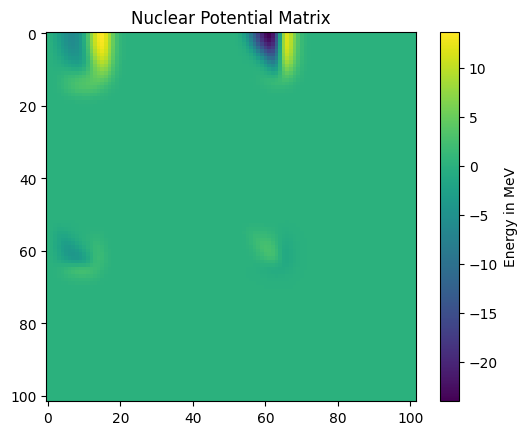

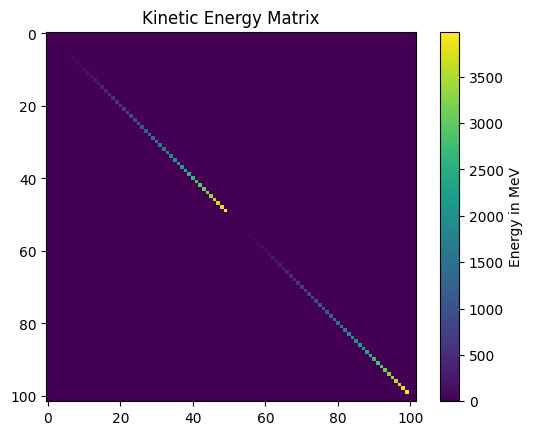

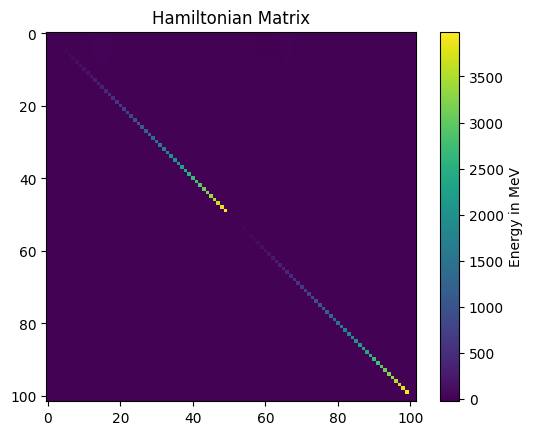

-2.2320553393282023


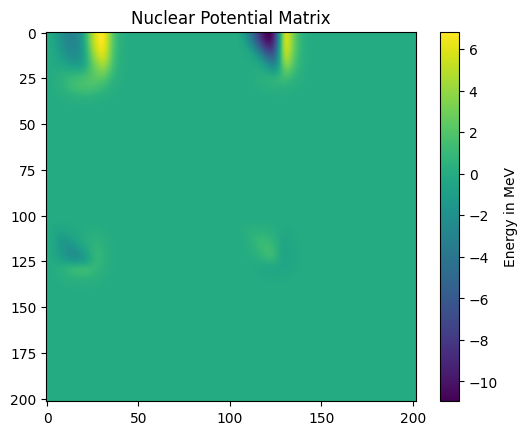

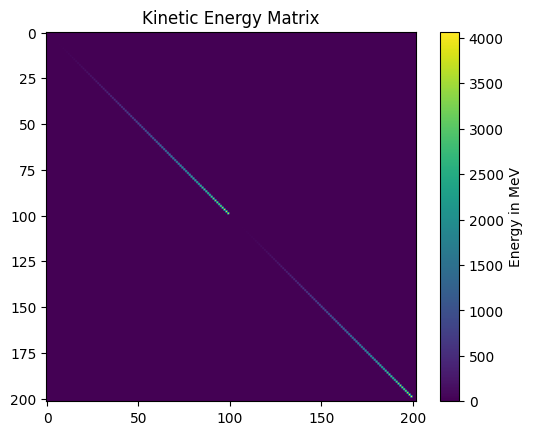

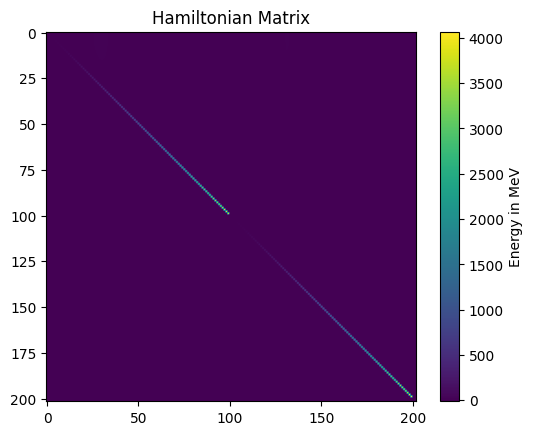

-2.230843892149183


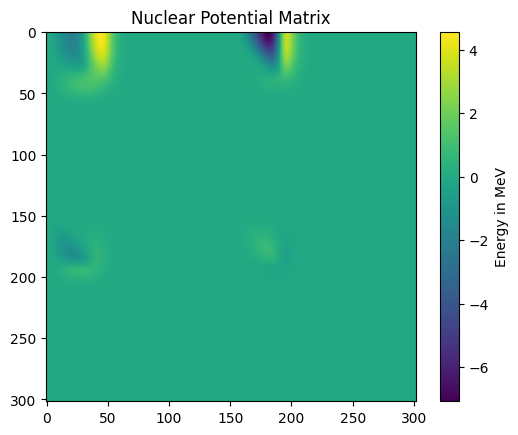

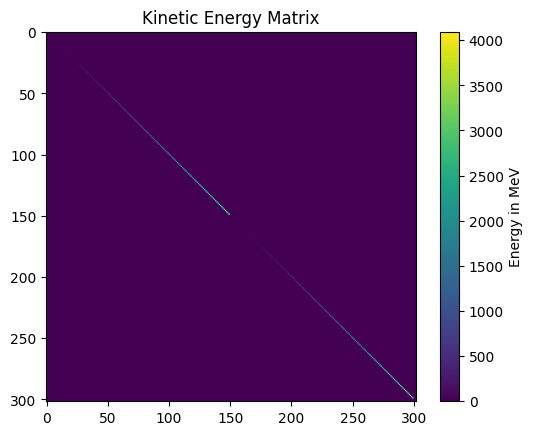

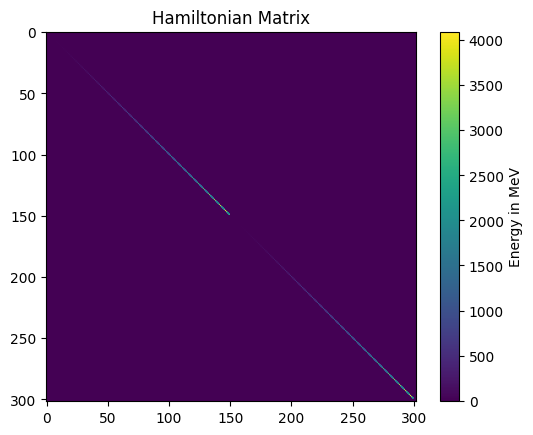

-2.226248740402748


In [36]:
def create_hamiltonian_momentum(grid_files_arr, grid_size, plotting = None):
    
    v_NN = np.block([[grid_files_arr[0], grid_files_arr[1]], [grid_files_arr[2], grid_files_arr[3]]]).astype(float)
    
    t_rel = np.eye(v_NN.shape[0])

    if grid_size == 50:
        q = np.arange(0, 10, 0.2)
    elif grid_size == 100:
        q = np.arange(0, 10, 0.1)
    elif grid_size == 150:
        q = np.arange(0, 10, 0.06666666666666667)
    else:
        print("Invalid grid size")
        return None
    
    del_q = q[1] - q[0]

    for i in range(v_NN.shape[0]):
        for j in range(v_NN.shape[1]):
            if i != j:
                v_NN[i][j] = v_NN[i][j] * del_q * q[j % len(q)] * q[j % len(q)]
            if i == j:
                t_rel[i][i] = (t_rel[i][i] * q[i % len(q)]**2) * ((197.327)**2/(1*938.272))
                v_NN[i][j] = v_NN[i][j] * del_q * q[j % len(q)] * q[j % len(q)]

    if plotting:
        
        plt.imshow(v_NN)
        plt.colorbar(label = "Energy in MeV")
        plt.title("Nuclear Potential Matrix")
        plt.show()
        
        plt.imshow(t_rel)
        plt.colorbar(label = "Energy in MeV")
        plt.title("Kinetic Energy Matrix")
        plt.show()

        plt.imshow(v_NN + t_rel)
        plt.colorbar(label = "Energy in MeV")
        plt.title("Hamiltonian Matrix")
        plt.show()

    return v_NN + t_rel

def solve_eigensystem_momentum(grid_files_arr, grid_size, plotting = None):
    
    H = create_hamiltonian_momentum(grid_files_arr, grid_size, plotting)
    
    w, v = np.linalg.eig(H)
    
    w = np.sort(w)
    
    return w[0]

# Solve the eigensystem of the Hamiltonian matrix for the chi2bM3A potential and the 50x50 grid
gsE = solve_eigensystem_momentum(grid050, 50, plotting = True)
print(gsE)

# Solve the eigensystem of the Hamiltonian matrix for the chi2bM3A potential and the 100x100 grid
gsE = solve_eigensystem_momentum(grid100, 100, plotting = True)
print(gsE)

# Solve the eigensystem of the Hamiltonian matrix for the chi2bM3A potential and the 150x150 grid
gsE = solve_eigensystem_momentum(grid150, 150, plotting = True)
print(gsE)
